<a href="https://colab.research.google.com/github/NehaSontakk/BATH-Prokka-Comparison/blob/main/phmmer_E_values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 14.0 MB/s eta 0:00:00


In [2]:
from Bio import SeqIO

In [3]:
import pandas as pd
import re
from Bio import SeqIO
df = pd.read_excel("/content/drive/MyDrive/Lab Work/Parkinsons_Data/BIN152/Alignment_Overlaps_Unique_Bedmap_COGs_bin152.xlsx")
dna_fasta_file = "/content/drive/MyDrive/Lab Work/Parkinsons_Data/BIN152/Prokka Output/bin152.fna"

In [4]:
#Extract the information for each row of information
def extract_info(row):
    if pd.notnull(row['BATH']):
        bath_data = re.split(r'\t|\s+', str(row['BATH']))
        #print(bath_data)
        row['BATH_contig'] = bath_data[0]
        if len(bath_data) >= 3:
            row['BATH_annot'] = bath_data[-3]
            if int(bath_data[1]) < int(bath_data[2]):
              row['BATH_start'] = abs(int(bath_data[1]))
              row['BATH_end'] = abs(int(bath_data[2]))
            else:
              row['BATH_end'] = abs(int(bath_data[1]))
              row['BATH_start'] = abs(int(bath_data[2]))
        else:
            row['BATH_annot'] = None

    if pd.notnull(row['Prokka']):
        prokka_data = re.split(r'\t|\s+', str(row['Prokka']))
        prokka_annotr = re.split(r':', str(row['Prokka']))[-1]
        row['Prokka_contig'] = prokka_data[0]
        if len(prokka_data) >= 3:
            #print("Prokka starts:",int(prokka_data[1]))
            row['Prokka_annot'] = prokka_annotr
            if int(prokka_data[1]) < int(prokka_data[2]):
              row['Prokka_start'] = abs(int(prokka_data[1]))
              row['Prokka_end'] = abs(int(prokka_data[2]))
            else:
              row['Prokka_end'] = abs(int(prokka_data[1]) )
              row['Prokka_start'] = abs(int(prokka_data[2]))
        else:
            row['Prokka_annot'] = None
    return row

In [5]:
df2 = df.apply(extract_info, axis=1)

In [6]:
df

,Unnamed: 0.1,Unnamed: 0,BATH,BATH_annot,BATH_contig,BATH_end,BATH_start,Prokka,Prokka_annot,Prokka_contig,...,Prokka ORF HMM phmmer E-value,Prokka ORF HMM phmmer ali from,Prokka ORF HMM phmmer ali to,Prokka ORF HMM phmmer length,Merged_Column,Prokka_SW,Annotation_Match,Prokka COGs,BATH COGs,Name_or_COG_Match
0,87,87,k127_2253129\t901\t2262\tQ99SX1\t+\t0,Q99SX1,k127_2253129,2262,901,k127_2253129\t895\t2301\tJNLINIBG_00430\t+\tab...,Q7A4P8,k127_2253129,...,NaN,NaN,NaN,NaN,471,Blast,No,NaN,NaN,No
1,90,90,k127_2253129\t11353\t11787\tO35016\t+\t0,O35016,k127_2253129,11787,11353,k127_2253129\t11320\t11796\tJNLINIBG_00436\t+\...,O35016,k127_2253129,...,NaN,NaN,NaN,NaN,145,Blast,Yes,COG0394,COG0394,Yes
2,91,91,k127_2033476\t541\t1671\tP80092\t+\t0,P80092,k127_2033476,1671,541,k127_2033476\t517\t1767\tJNLINIBG_00225\t+\tab...,P54955,k127_2033476,...,NaN,NaN,NaN,NaN,354,Blast,No,COG1473,arCOG01108,No
3,92,92,k127_2033476\t3426\t3785\tMF_00101\t+\t0,MF_00101,k127_2033476,3785,3426,k127_2033476\t3423\t3815\tJNLINIBG_00228\t+\ta...,Q9KPB6,k127_2033476,...,NaN,NaN,NaN,NaN,118,Blast,No,COG0736,COG0736,Yes
4,93,93,k127_2033476\t3829\t5298\tQ9X024\t+\t0,Q9X024,k127_2033476,5298,3829,k127_2033476\t3796\t5328\tJNLINIBG_00229\t+\ta...,Q9X024,k127_2033476,...,NaN,NaN,NaN,NaN,480,Blast,Yes,COG0062,COG0062,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,401,401,k127_2982141\t9733\t11265\tMF_00139\t+\t0,MF_00139,k127_2982141,11265,9733,k127_2982141\t9727\t11271\tJNLINIBG_00634\t+\t...,P67544,k127_2982141,...,NaN,NaN,NaN,NaN,490,Blast,No,NaN,KOG2555,No
293,402,402,k127_2982141\t11286\t12548\tMF_00138\t+\t0,MF_00138,k127_2982141,12548,11286,k127_2982141\t11286\t12566\tJNLINIBG_00635\t+\...,P12039,k127_2982141,...,NaN,NaN,NaN,NaN,417,Blast,No,COG0151,KOG0237,No
294,403,403,k127_2982141\t12931\t13911\tA3DDX7\t+\t0,A3DDX7,k127_2982141,13911,12931,k127_2982141\t12928\t13914\tJNLINIBG_00636\t+\...,A3DDX7,k127_2982141,...,NaN,NaN,NaN,NaN,325,Blast,Yes,COG1748,COG1748,Yes
295,405,405,k127_2982141\t16989\t17780\tMF_00228\t+\t0,MF_00228,k127_2982141,17780,16989,k127_2982141\t16983\t17789\tJNLINIBG_00640\t+\...,P39593,k127_2982141,...,NaN,NaN,NaN,NaN,256,Blast,No,COG2145,COG2145,Yes


## Get BATH E-values

In [7]:
bath_protein = pd.read_excel("/content/drive/MyDrive/Lab Work/Parkinsons_Data/BIN152/Deduplication Output/dedup_bin52_test1.xlsx")
unnamed_cols = [col for col in bath_protein.columns if col.startswith('Unnamed')]
bath_protein.drop(columns=unnamed_cols, inplace=True)

In [8]:
df3 = pd.merge(df2,bath_protein[['target name','query name','E-value','shifts']],how="left",left_on=['BATH_contig','BATH_annot'],right_on=['target name','query name'])

In [9]:
!sudo apt-get update
!sudo apt-get install hmmer

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Ign:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:8 https://r2u.stat.illinois.edu/ubuntu jammy Release
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [2,446 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,422 kB]
Get:14 http://archiv

In [10]:
#Finding the Prokka protein
import os

file_paths = [
    "/content/drive/MyDrive/Lab Work/Parkinsons_Data/Prokka db/kingdom/Bacteria/sprot",
    "/content/drive/MyDrive/Lab Work/Parkinsons_Data/Prokka db/kingdom/Bacteria/IS",
    "/content/drive/MyDrive/Lab Work/Parkinsons_Data/Prokka db/kingdom/Bacteria/AMR",
    "/content/drive/MyDrive/Lab Work/Parkinsons_Data/Prokka db/kingdom/Archaea/sprot",
    "/content/drive/MyDrive/Lab Work/Parkinsons_Data/Prokka db/kingdom/Mitochondria/sprot",
    "/content/drive/MyDrive/Lab Work/Parkinsons_Data/Prokka db/kingdom/Viruses/sprot"
]
combined_file = "/content/drive/MyDrive/Lab Work/Parkinsons_Data/combined_sequences.fasta"

with open(combined_file, 'w') as combined_fasta:
    for file_path in file_paths:
        if os.path.exists(file_path):
            for record in SeqIO.parse(file_path, "fasta"):
                SeqIO.write(record, combined_fasta, "fasta")
        else:
            print(f"File not found: {file_path}")

def get_fasta_entries(fasta_path, protein_name):
    #print(protein_name)
    if pd.isna(protein_name):
          return None
    for record in SeqIO.parse(fasta_path, "fasta"):
        if protein_name == record.name:
          #print(record.seq)
          return str(record.seq)

def get_prokka_fasta_sequence(row):
    return get_fasta_entries(combined_file, row['Prokka_annot'])



In [11]:
import numpy as np
df3['Prokka_annot'] = df3['Prokka_annot'].str.replace("002006", "", regex=False)
df3['Prokka_annot'].replace("", np.nan, inplace=True)

In [12]:
df3['Prokka Uniprot Protein Sequence'] = df3.apply(get_prokka_fasta_sequence,axis=1)

In [13]:
df3[~df3['Prokka_annot'].isna()]['Prokka Uniprot Protein Sequence']

,Prokka Uniprot Protein Sequence
0,MAYFNQHQSMISKRYLTFFSKSKKKKPFSAGQLIGLILGPLLFLLT...
1,MISVLFVCLGNICRSPMAEAIFRDLAAKKGLEGKIKADSAGIGGWH...
2,MADKAFHTRLINMRRDLHEHPELSFQEVETTKKIRRWLEEEQIEIL...
3,MIVGLGTDIAEIERVEKALARSGENFARRILTDSELEQFHASKQQG...
4,MKEIDELTIKEYGVDSRILMERAGISVVLAMEEELGNLSDYRFLVL...
...,...
346,MKKAILSVSNKTGIVEFAKALTQLNYELYSTGGTKRILDEANVPVR...
347,MNVLIIGKGGREHTLAWKAAQSSLVENVFAAPGNDGMAASAQLVNI...
348,MGGVTLEKIRIGIVGYGNLGKGAELGIRQNKDMELVGIFTRRNPNS...
349,MDAQSAAKCLTAVRRHSPLVHSITNNVVTNFTANGLLALGASPVMA...


In [14]:
df3

,Unnamed: 0.1,Unnamed: 0,BATH,BATH_annot,BATH_contig,BATH_end,BATH_start,Prokka,Prokka_annot,Prokka_contig,...,Merged_Column,Prokka_SW,Annotation_Match,Prokka COGs,BATH COGs,Name_or_COG_Match,target name_y,query name_y,E-value_y,shifts_y
0,87,87,k127_2253129\t901\t2262\tQ99SX1\t+\t0,Q99SX1,k127_2253129,2262,901,k127_2253129\t895\t2301\tJNLINIBG_00430\t+\tab...,Q7A4P8,k127_2253129,...,471,Blast,No,NaN,NaN,No,k127_2253129,Q99SX1,4.800000e-33,0
1,90,90,k127_2253129\t11353\t11787\tO35016\t+\t0,O35016,k127_2253129,11787,11353,k127_2253129\t11320\t11796\tJNLINIBG_00436\t+\...,O35016,k127_2253129,...,145,Blast,Yes,COG0394,COG0394,Yes,k127_2253129,O35016,5.000000e-24,0
2,91,91,k127_2033476\t541\t1671\tP80092\t+\t0,P80092,k127_2033476,1671,541,k127_2033476\t517\t1767\tJNLINIBG_00225\t+\tab...,P54955,k127_2033476,...,354,Blast,No,COG1473,arCOG01108,No,k127_2033476,P80092,2.000000e-53,0
3,92,92,k127_2033476\t3426\t3785\tMF_00101\t+\t0,MF_00101,k127_2033476,3785,3426,k127_2033476\t3423\t3815\tJNLINIBG_00228\t+\ta...,Q9KPB6,k127_2033476,...,118,Blast,No,COG0736,COG0736,Yes,k127_2033476,MF_00101,5.900000e-19,0
4,93,93,k127_2033476\t3829\t5298\tQ9X024\t+\t0,Q9X024,k127_2033476,5298,3829,k127_2033476\t3796\t5328\tJNLINIBG_00229\t+\ta...,Q9X024,k127_2033476,...,480,Blast,Yes,COG0062,COG0062,Yes,k127_2033476,Q9X024,6.400000e-84,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,401,401,k127_2982141\t9733\t11265\tMF_00139\t+\t0,MF_00139,k127_2982141,11265,9733,k127_2982141\t9727\t11271\tJNLINIBG_00634\t+\t...,P67544,k127_2982141,...,490,Blast,No,NaN,KOG2555,No,k127_2982141,MF_00139,1.200000e-229,0
347,402,402,k127_2982141\t11286\t12548\tMF_00138\t+\t0,MF_00138,k127_2982141,12548,11286,k127_2982141\t11286\t12566\tJNLINIBG_00635\t+\...,P12039,k127_2982141,...,417,Blast,No,COG0151,KOG0237,No,k127_2982141,MF_00138,2.900000e-169,0
348,403,403,k127_2982141\t12931\t13911\tA3DDX7\t+\t0,A3DDX7,k127_2982141,13911,12931,k127_2982141\t12928\t13914\tJNLINIBG_00636\t+\...,A3DDX7,k127_2982141,...,325,Blast,Yes,COG1748,COG1748,Yes,k127_2982141,A3DDX7,3.000000e-134,0
349,405,405,k127_2982141\t16989\t17780\tMF_00228\t+\t0,MF_00228,k127_2982141,17780,16989,k127_2982141\t16983\t17789\tJNLINIBG_00640\t+\...,P39593,k127_2982141,...,256,Blast,No,COG2145,COG2145,Yes,k127_2982141,MF_00228,4.700000e-89,0


In [15]:
def get_bath_fasta_sequence(row):
    return get_fasta_entries(combined_file, row['BATH_annot'])

In [16]:
df3['BATH Uniprot Protein Sequence'] = df3.apply(get_bath_fasta_sequence,axis=1)

In [18]:
import os
import subprocess
import pandas as pd
import numpy as np

def fetch_onlyhmm_path(protein_name, hmm_db_path):
    hmm_output_path = f"/content/output_{protein_name}.hmm"
    fetch_command = f"hmmfetch -o '{hmm_output_path}' '{hmm_db_path}' '{protein_name}'"
    result = os.system(fetch_command)
    if result != 0:
        print(f"Failed to fetch HMM for {protein_name} from {hmm_db_path}")
        return None
    if os.path.getsize(hmm_output_path) == 0:  # Check if the file is empty
        print(f"Warning: Generated HMM file {hmm_output_path} is empty.")
        return None
    return hmm_output_path

def run_phmmer_HAMAP_Uniprot(row, output_dir):
    out_path = None
    result = None
    prokka_protein_sequence_path = None
    bath_protein_sequence_path = None

    if pd.isna(row['Prokka_annot']) or pd.isna(row['BATH_annot']):
        return np.nan, np.nan, np.nan

    if row['Prokka_annot'].startswith('MF_'):
        prokka_hmm_output_path = fetch_onlyhmm_path(row['Prokka_annot'], hmm_db_path)
        if prokka_hmm_output_path is None:
            return np.nan, np.nan, np.nan

    if row['BATH_annot'].startswith('MF_'):
        bath_hmm_output_path = fetch_onlyhmm_path(row['BATH_annot'], hmm_db_path)
        if bath_hmm_output_path is None:
            return np.nan, np.nan, np.nan

    if row['Prokka_annot'].startswith('MF_') and row['BATH_annot'].startswith('MF_'):
        out_path = os.path.join(output_dir, f"{row['Prokka_annot']}_{row['BATH_annot']}_results.out")
        cmd = ['phmmer', '--tblout', out_path, bath_hmm_output_path, prokka_hmm_output_path]
        result = subprocess.run(cmd, capture_output=True, text=True)

    elif row['Prokka_annot'].startswith('MF_'):
        out_path = os.path.join(output_dir, f"{row['Prokka_annot']}_{row['BATH_annot']}_results.out")
        prokka_protein_sequence_path = os.path.join(output_dir, f"{row['BATH_annot']}_forphmmer.fa")
        with open(prokka_protein_sequence_path, 'w') as protein_file:
            protein_file.write(f">{row['BATH_annot']}\n{row['BATH Uniprot Protein Sequence']}\n")
        cmd = ['phmmer', '--tblout', out_path, prokka_protein_sequence_path, prokka_hmm_output_path]
        result = subprocess.run(cmd, capture_output=True, text=True)

    elif row['BATH_annot'].startswith('MF_'):
        out_path = os.path.join(output_dir, f"{row['Prokka_annot']}_{row['BATH_annot']}_results.out")
        bath_protein_sequence_path = os.path.join(output_dir, f"{row['Prokka_annot']}_forphmmer.fa")
        with open(bath_protein_sequence_path, 'w') as protein_file:
            protein_file.write(f">{row['Prokka_annot']}\n{row.get('Prokka Uniprot Protein Sequence', '')}\n")
        cmd = ['phmmer', '--tblout', out_path, bath_protein_sequence_path, bath_hmm_output_path]
        result = subprocess.run(cmd, capture_output=True, text=True)

    else:
        out_path = os.path.join(output_dir, f"{row['Prokka_annot']}_{row['BATH_annot']}_results.out")
        prokka_protein_sequence_path = os.path.join(output_dir, f"{row['Prokka_annot']}_forphmmer.fa")
        bath_protein_sequence_path = os.path.join(output_dir, f"{row['BATH_annot']}_forphmmer.fa")
        with open(prokka_protein_sequence_path, 'w') as protein_file:
            protein_file.write(f">{row['Prokka_annot']}\n{row.get('Prokka Uniprot Protein Sequence', '')}\n")
        with open(bath_protein_sequence_path, 'w') as protein_file:
            protein_file.write(f">{row['BATH_annot']}\n{row.get('BATH Uniprot Protein Sequence', '')}\n")
        cmd = ['phmmer', '--tblout', out_path, bath_protein_sequence_path, prokka_protein_sequence_path]
        result = subprocess.run(cmd, capture_output=True, text=True)

    # Handle result and clean up
    e_value, i_evalue, c_evalue = "No match", "No match", "No match"
    found_match = False

    if result and result.returncode == 0:
        with open(out_path, 'r') as file:
            for line in file:
                if not line.startswith("#"):
                    found_match = True
                    parts = line.strip().split()
                    if len(parts) > 11:  # Verify the column count
                        e_value = parts[4]
                        i_evalue = parts[11]  # Typical i-Evalue column
                        c_evalue = parts[10]  # Typical c-Evalue column
                        break
        if not found_match:
            return "No significant matches found", "No significant matches found", "No significant matches found"

    else:
        print(f"Error running phmmer: {result.stderr}")

    # Cleanup files
    if os.path.exists(out_path):
        os.remove(out_path)
    if 'prokka_hmm_output_path' in locals() and os.path.exists(prokka_hmm_output_path):
        os.remove(prokka_hmm_output_path)
    if 'bath_hmm_output_path' in locals() and os.path.exists(bath_hmm_output_path):
        os.remove(bath_hmm_output_path)
    if prokka_protein_sequence_path and os.path.exists(prokka_protein_sequence_path):
        os.remove(prokka_protein_sequence_path)
    if bath_protein_sequence_path and os.path.exists(bath_protein_sequence_path):
        os.remove(bath_protein_sequence_path)

    return e_value, i_evalue, c_evalue


output_dir = "/content/"
hmm_db_path = "/content/drive/MyDrive/Lab Work/Parkinsons_Data/Prokka db/hmm/HAMAP.hmm"
df3['phmmer_eic_values'] = df3.apply(run_phmmer_HAMAP_Uniprot, axis=1, args=(output_dir,))


Failed to fetch HMM for MF_00101 from /content/drive/MyDrive/Lab Work/Parkinsons_Data/Prokka db/hmm/HAMAP.hmm
Error running phmmer: 
Error: Target sequence database file /content/output_MF_01642.hmm is empty or misformatted


Error running phmmer: 
Error: Target sequence database file /content/output_MF_00944.hmm is empty or misformatted


Error running phmmer: 
Error: Target sequence database file /content/output_MF_00095.hmm is empty or misformatted


Error running phmmer: 
Error: Target sequence database file /content/output_MF_01469.hmm is empty or misformatted


Error running phmmer: 
Error: Target sequence database file /content/output_MF_00607.hmm is empty or misformatted


Failed to fetch HMM for MF_00176 from /content/drive/MyDrive/Lab Work/Parkinsons_Data/Prokka db/hmm/HAMAP.hmm
Failed to fetch HMM for MF_01562 from /content/drive/MyDrive/Lab Work/Parkinsons_Data/Prokka db/hmm/HAMAP.hmm
Error running phmmer: 
Error: Target sequence database file /content/output_MF_01425.hmm i

In [19]:
df3['phmmer_eic_values'].dropna()

,phmmer_eic_values
0,"(0, 1, 1.0)"
1,"(8.5e-109, 1, 1.0)"
2,"(4.7e-89, 1, 1.0)"
3,"(nan, nan, nan)"
4,"(0, 1, 1.0)"
...,...
346,"(No match, No match, No match)"
347,"(No match, No match, No match)"
348,"(1.3e-231, 1, 1.0)"
349,"(No match, No match, No match)"


In [20]:
df3[['phmmeroutput_e_value', 'phmmeroutput_i_value', 'phmmeroutput_c_value']] = pd.DataFrame(df3['phmmer_eic_values'].tolist(), index=df3.index)

In [21]:
df3[['phmmeroutput_e_value', 'phmmeroutput_i_value', 'phmmeroutput_c_value','Name_or_COG_Match']].dropna()

,phmmeroutput_e_value,phmmeroutput_i_value,phmmeroutput_c_value,Name_or_COG_Match
0,0,1,1.0,No
1,8.5e-109,1,1.0,Yes
2,4.7e-89,1,1.0,No
4,0,1,1.0,Yes
5,1.5e-239,1,1.0,Yes
...,...,...,...,...
346,No match,No match,No match,No
347,No match,No match,No match,No
348,1.3e-231,1,1.0,Yes
349,No match,No match,No match,Yes


In [22]:
df3.to_excel("/content/drive/MyDrive/Lab Work/Parkinsons_Data/Organized/phmmer_Evalues_COG_Matches.xlsx")

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-23-cd2eb62c2f56>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Name_or_COG_Match', y='Log_Evalue', data=melted_df, palette=palette)


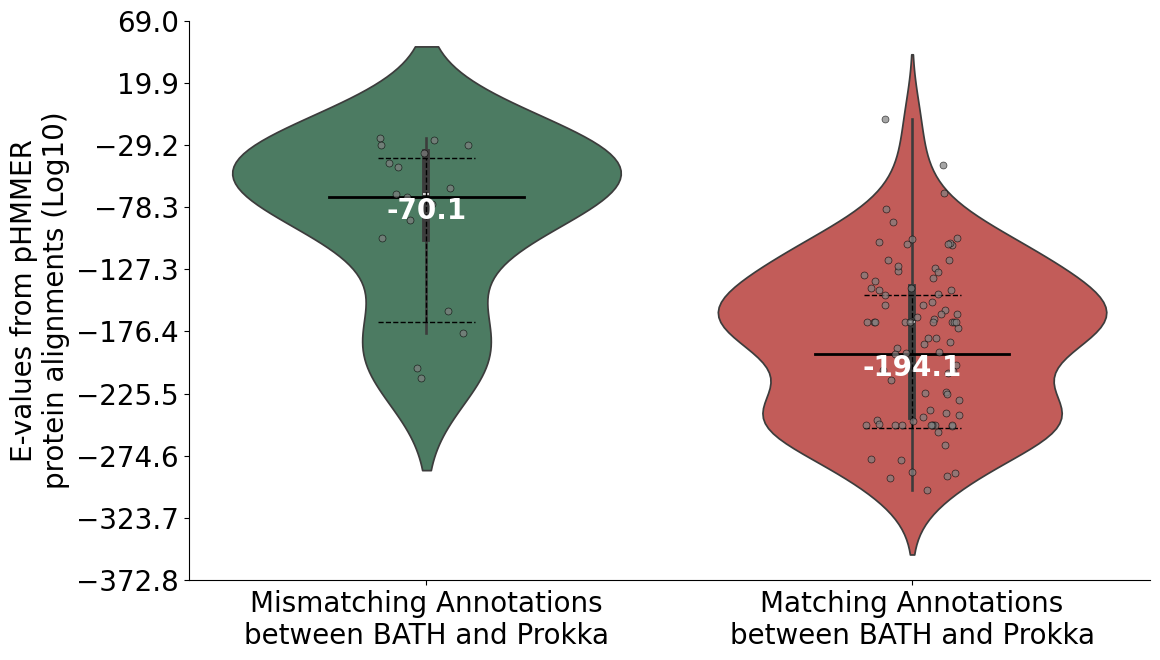

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')

# Load the data
df3 = pd.read_excel("/content/drive/MyDrive/Lab Work/Parkinsons_Data/Organized/phmmer_Evalues_COG_Matches.xlsx")

# Filter out non-numeric values
numeric_values = pd.to_numeric(df3['phmmeroutput_e_value'], errors='coerce')

# Apply log normalization only to numeric values
df3['Log_phmmeroutput_e_value'] = np.log10(numeric_values)

# Melt the DataFrame for plotting
melted_df = pd.melt(df3, id_vars='Name_or_COG_Match', value_vars=['Log_phmmeroutput_e_value'],
                    var_name='Variable', value_name='Log_Evalue')

# Define the color palette
palette = ['#D44C47','#448361']

# Set font size
font_size = 20
plt.rc('font', size=font_size)          # controls default text sizes
plt.rc('axes', titlesize=font_size)     # fontsize of the axes title
plt.rc('axes', labelsize=font_size)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=font_size)    # fontsize of the tick labels
plt.rc('ytick', labelsize=font_size)    # fontsize of the tick labels
plt.rc('legend', fontsize=font_size)    # legend fontsize
plt.rc('figure', titlesize=font_size)   # fontsize of the figure title

# Plotting the violin plot along with strip plot for detailed data view
plt.figure(figsize=(12, 7))
sns.violinplot(x='Name_or_COG_Match', y='Log_Evalue', data=melted_df, palette=palette)
sns.stripplot(x='Name_or_COG_Match', y='Log_Evalue', data=melted_df, edgecolor='black', linewidth=0.5, color='grey', alpha=0.7, jitter=True)

# Customize the x-axis labels
custom_labels = ['Mismatching Annotations\nbetween BATH and Prokka', 'Matching Annotations\nbetween BATH and Prokka']
plt.xticks(ticks=range(len(custom_labels)), labels=custom_labels, rotation=0, ha='center')

# Calculate and annotate the median and quartile values
for idx, label in enumerate(melted_df['Name_or_COG_Match'].unique()):
    label_data = melted_df[melted_df['Name_or_COG_Match'] == label]['Log_Evalue']
    median = label_data.median()
    q1 = label_data.quantile(0.25)
    q3 = label_data.quantile(0.75)

    plt.text(idx, median, f'{median:.1f}', ha='center', va='top', color='white', fontweight='bold')
    plt.plot([idx-0.2, idx+0.2], [median, median], color='black', lw=2)
    plt.plot([idx-0.1, idx+0.1], [q1, q1], color='black', lw=1, linestyle='--')
    plt.plot([idx-0.1, idx+0.1], [q3, q3], color='black', lw=1, linestyle='--')
    plt.plot([idx, idx], [q1, q3], color='black', lw=1, linestyle='--')

# Customize the plot appearance
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

ylim = plt.gca().get_ylim()
yticks = np.linspace(ylim[0], ylim[1], num=10)  # Increase the number of intervals
plt.yticks(yticks)

# Set title and labels
#plt.title('pHmmer E-Values for matching and mismatching annotations from BATH and Prokka')
plt.xlabel('')
plt.ylabel('E-values from pHMMER\nprotein alignments (Log10)')
plt.tight_layout()
plt.savefig("Fig5B_phmmerProkkaBATH.svg", dpi=300, transparent=True, bbox_inches='tight')
plt.show()


In [24]:
df3['Prokka'].dropna()

,Prokka
0,k127_2253129\t895\t2301\tJNLINIBG_00430\t+\tab...
1,k127_2253129\t11320\t11796\tJNLINIBG_00436\t+\...
2,k127_2033476\t517\t1767\tJNLINIBG_00225\t+\tab...
3,k127_2033476\t3423\t3815\tJNLINIBG_00228\t+\ta...
4,k127_2033476\t3796\t5328\tJNLINIBG_00229\t+\ta...
...,...
346,k127_2982141\t9727\t11271\tJNLINIBG_00634\t+\t...
347,k127_2982141\t11286\t12566\tJNLINIBG_00635\t+\...
348,k127_2982141\t12928\t13914\tJNLINIBG_00636\t+\...
349,k127_2982141\t16983\t17789\tJNLINIBG_00640\t+\...


In [25]:
df3['BATH'].dropna()

,BATH
0,k127_2253129\t901\t2262\tQ99SX1\t+\t0
1,k127_2253129\t11353\t11787\tO35016\t+\t0
2,k127_2033476\t541\t1671\tP80092\t+\t0
3,k127_2033476\t3426\t3785\tMF_00101\t+\t0
4,k127_2033476\t3829\t5298\tQ9X024\t+\t0
...,...
346,k127_2982141\t9733\t11265\tMF_00139\t+\t0
347,k127_2982141\t11286\t12548\tMF_00138\t+\t0
348,k127_2982141\t12931\t13911\tA3DDX7\t+\t0
349,k127_2982141\t16989\t17780\tMF_00228\t+\t0


In [26]:
df3['Annotation_Match'].value_counts()

,count
Annotation_Match,
No,205
Yes,146


In [27]:
df3.columns

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'BATH', 'BATH_annot',
       'BATH_contig', 'BATH_end', 'BATH_start', 'Prokka', 'Prokka_annot',
       'Prokka_contig', 'Prokka_end', 'Prokka_start', 'label', 'target name_x',
       'query name_x', 'E-value_x', 'shifts_x', 'Prodigal ORF Amino',
       'HMM_Alignment_Length', 'Protein_HMM_filepath',
       'Protein_FA_File_Status', 'Protein_FA_File_Path',
       'Prokka Uniprot Protein Sequence', 'Prodigal ORF Length',
       'Prokka ORF phmmer E-value', 'Prokka ORF phmmer ali from',
       'Prokka ORF phmmer ali to', 'Prokka ORF phmmer length',
       'Prokka ORF HMM phmmer E-value', 'Prokka ORF HMM phmmer ali from',
       'Prokka ORF HMM phmmer ali to', 'Prokka ORF HMM phmmer length',
       'Merged_Column', 'Prokka_SW', 'Annotation_Match', 'Prokka COGs',
       'BATH COGs', 'Name_or_COG_Match', 'target name_y', 'query name_y',
       'E-value_y', 'shifts_y', 'BATH Uniprot Protein Sequence',
       'phmmer_eic_values', 'phmmeroutp